# **Keras**

In [34]:
# ipython-input-25-9da4ac0dd528
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy and assign it the alias 'np'
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
dataset = pd.read_csv('multiple_linear_regression_dataset.csv')

# Mostrar las primeras filas
df = (dataset.head())
df


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [39]:
# Separar las características (age, experience) y la variable objetivo (income)
X = dataset[['age', 'experience']].values
y = dataset['income'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características (opcional, pero generalmente recomendable)
scaler = StandardScaler() # Now StandardScaler is defined and can be used
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Crear el modelo de regresión lineal
model = keras.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='linear'))  # input_dim=2 porque tenemos 2 características (age, experience)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo and store the training history
history = model.fit(X_train, y_train, epochs=100, verbose=1) # Assign the result of model.fit to history

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Loss (MSE) en el conjunto de prueba: {loss}")

# Hacer predicciones
y_pred = model.predict(X_test)

# Mostrar algunas predicciones junto con los valores reales
# Change the loop to iterate over the length of y_pred or y_test
for i in range(len(y_test)):  # or range(y_pred.shape[0])
    print(f"Predicted: {y_pred[i][0]}, Actual: {y_test[i]}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 1867218048.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1867217920.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1867217920.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1867217792.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1867217664.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 1867217664.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1867217536.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1867217408.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1867217152.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1867217152.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1867217152.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1867217024.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1867216768.0000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms

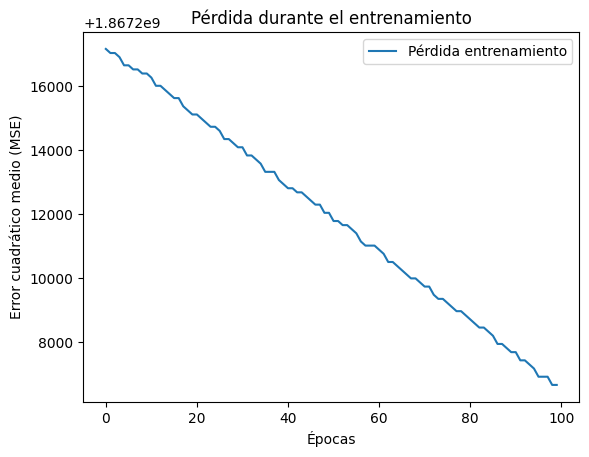

In [37]:
# ipython-input-35-9da4ac0dd528
# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida entrenamiento') # Now history is defined and can be used
#plt.plot(history.history['val_loss'], label='Pérdida validación') # This line might cause an error if you didn't use a validation set during training.
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio (MSE)')
plt.legend()
plt.show()

# **MLPregressor**

In [28]:
# Crear el modelo MLPRegressor para una regresión lineal
mlp = MLPRegressor(hidden_layer_sizes=(), activation='identity', solver='adam', max_iter=1000, random_state=42)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Hacer predicciones
y_pred = mlp.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

# ... (previous code)

# Mostrar algunas predicciones junto con los valores reales
for i in range(len(y_test)):  # Change to len(y_test) or y_test.shape[0]
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")


Error cuadrático medio (MSE): 1166537120.0964913
Predicted: -3.1162815447293424, Actual: 30450
Predicted: -3.263674935430875, Actual: 30870
Predicted: 0.9580396560811995, Actual: 38900
Predicted: -1.5897284378961987, Actual: 35670


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


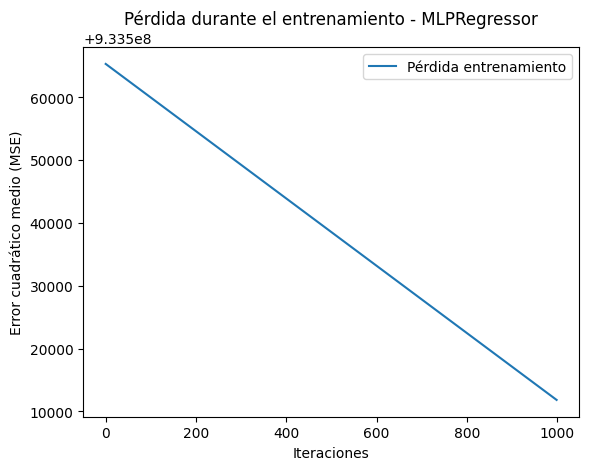

In [38]:
# Graficar la curva de pérdida
plt.plot(mlp.loss_curve_, label='Pérdida entrenamiento')
plt.title('Pérdida durante el entrenamiento - MLPRegressor')
plt.xlabel('Iteraciones')
plt.ylabel('Error cuadrático medio (MSE)')
plt.legend()
plt.show()